In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from gzbuilderspirals import xy_from_r_theta
from gzbuilderspirals.oo import Pipeline

In [3]:
expt = np.linspace(np.exp(0), np.exp(2*np.pi), 100)
t = np.linspace(1, 2*np.pi+1)

In [4]:
def log_spiral(a, b, t=t, dt=0):
    return a * np.exp(b * t), t+dt

def gen_noisy_arm_from_tpl(template, v=3):
    ltp = np.clip(np.random.randn()+1, 0, 3)
    large_scale_noise = (np.sin(ltp*template[1]) - 0.5) * np.random.randn()*v*3
    r_n = template[0] \
        + np.random.randn(len(template[0])) * v \
        + large_scale_noise
    return r_n, template[1] + np.random.randn()*0.1

In [5]:
template1 = log_spiral(20, 0.3, t=t)
template2 = log_spiral(20, 0.3, t=t[int(len(t) * 3/4):])
template3 = log_spiral(20, 0.3, t=t[:int(len(t) * 2/3)])
template4 = log_spiral(20, 0.3, t=t, dt=np.pi)

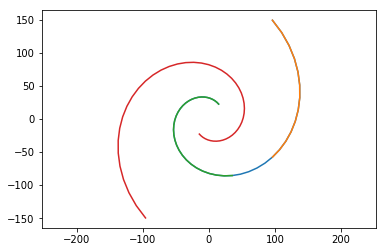

In [6]:
plt.plot(*xy_from_r_theta(*template1))
plt.plot(*xy_from_r_theta(*template2))
plt.plot(*xy_from_r_theta(*template3))
plt.plot(*xy_from_r_theta(*template4))
plt.axis('equal');

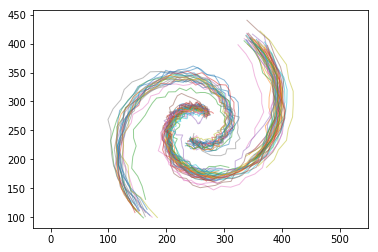

In [7]:
drawn_arms = [
    np.stack(xy_from_r_theta(*gen_noisy_arm_from_tpl(template1)), axis=1) + 256
    for i in range(20)
] + [
    np.stack(xy_from_r_theta(*gen_noisy_arm_from_tpl(template2)), axis=1) + 256
    for i in range(20)
] + [
    np.stack(xy_from_r_theta(*gen_noisy_arm_from_tpl(template3)), axis=1) + 256
    for i in range(20)
] + [
    np.stack(xy_from_r_theta(*gen_noisy_arm_from_tpl(template4)), axis=1) + 256
    for i in range(20)
]
np.random.shuffle(drawn_arms)

for arm in drawn_arms:
    plt.plot(*arm.T, alpha=0.5, linewidth=1)
plt.axis('equal');

In [8]:
p = Pipeline(drawn_arms, phi=0, ba=1, image_size=512,
             distances=None, parallel=True, bar_length=1)

In [9]:
arms = p.get_arms(merge=False)

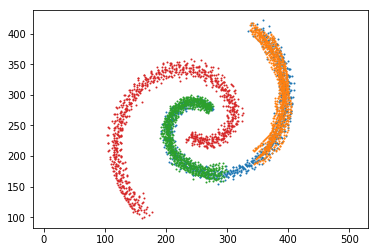

In [10]:
for arm in arms:
    plt.plot(*arm.coords[arm.outlier_mask].T, '.', markersize=2)
plt.axis('equal');

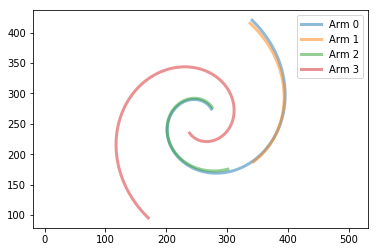

In [11]:
for i, arm in enumerate(arms):
    plt.plot(*arm.log_spiral.T, label='Arm {}'.format(i), linewidth=3, alpha=0.5)
plt.legend()
plt.axis('equal');

In [12]:
merged_arms = p.merge_arms(arms)
# can also accomplish by arms = p.get_arms(merge=True)

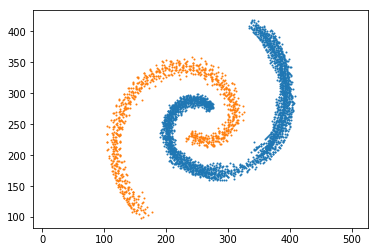

In [13]:
for arm in merged_arms:
    plt.plot(*arm.coords[arm.outlier_mask].T, '.', markersize=2)
plt.axis('equal');

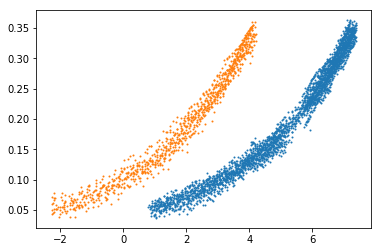

In [14]:
for arm in merged_arms:
    plt.plot(arm.t, arm.R, '.', markersize=2)

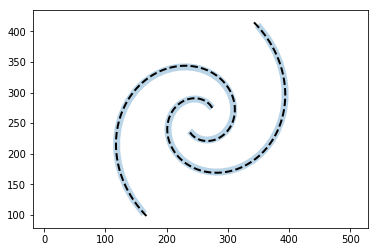

In [37]:
plt.plot(*np.array(xy_from_r_theta(*template1)) + 256, 'C0', linewidth=7, alpha=0.3)
plt.plot(*np.array(xy_from_r_theta(*template4)) + 256, 'C0', linewidth=7, alpha=0.3)
for i, arm in enumerate(merged_arms):
    plt.plot(*arm.log_spiral.T, 'k--', linewidth=2, alpha=1)
plt.axis('equal');

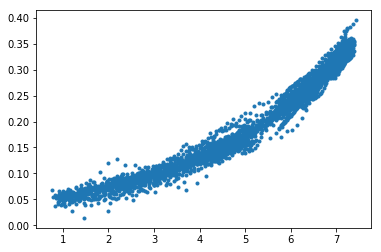

In [16]:
from gzbuilderspirals.fitting import unwrap

theta, r, groups = merged_arms[0].t_all, merged_arms[0].R_all, merged_arms[0].groups_all
t_s = unwrap(theta, r, groups)
plt.plot(t_s, r, '.')